## Spam Email Classification

## 1. Problem Statement

The goal of this project is to classify emails based on whether they are spam or not. I follow the strategy outline in Chapter 3 of the textbook *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (it discusses a different dataset (MNIST dataset)).

Dataset Link: https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset/code

Here is a describtion of the dataset:

**Columns**

- '1' indicates that the email is classified as spam.
- '0' denotes that the email is legitimate.

**text**
- This column contains the actual content of the email messages.


This implies that we have to somehow tokenize the text.

### 1.1. Goals

I train the following classifiers:
   1. stochastic gradient descent
   2. perceptron 
   3. decision tree
   4. logistic regression
   5. KNearesNeighbor
   6. random forest

## 2. Loading the Data

In [1]:
import pandas as pd
import os

def load_email_dataset():
    csv_path = os.path.join("C:\\Users\\Rami\\Desktop\\Folders\\Datasets\\Spam\\combined_data.csv")
    return pd.read_csv(csv_path)


In [2]:
emails = load_email_dataset()
emails

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


As we observe, the dataset has 83,448 rows. We can extract the features and the labels separately:

In [3]:
# Split the dataset into features (X) and labels (y)
X = emails["text"]
y = emails["label"]

In [4]:
X

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get your medircations online qnb ikud v...
2         computer connection from cnn com wednesday es...
3        university degree obtain a prosperous future m...
4        thanks for all your answers guys i know i shou...
                               ...                        
83443    hi given a date how do i get the last date of ...
83444    now you can order software on cd or download i...
83445    dear valued member canadianpharmacy provides a...
83446    subscribe change profile contact us long term ...
83447    get the most out of life ! viagra has helped m...
Name: text, Length: 83448, dtype: object

Let's get a single example (email) out of the dataset. We might want to use it on one of our classifiers later on.

In [5]:
first_email = X[0]
first_email

'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage'

## 3. Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train

25761    find the position of the first value who equal...
32181    more enjoyable may be future post offices will...
71893    dear valued member we just found new weight lo...
48954    log on to e - zone that provides customers q ....
17722    we have everything you need escapelong cialesc...
                               ...                        
77649    increase your cum volume , and orgasm length\n...
30593    gorgeous presents you may find make this clear...
28394    the internet home of home news markets technol...
19934    ïðåí·üµäü·¯ça ì©ªí·²­g...
15717    dear audience during the testing stage of an x...
Name: text, Length: 66758, dtype: object

In [8]:
y_train

25761    0
32181    1
71893    1
48954    1
17722    1
        ..
77649    1
30593    1
28394    0
19934    1
15717    0
Name: label, Length: 66758, dtype: int64

## 4. Data Cleaning Preprocessing and Transformation: the Pipeline

As we discussed in our introduction, the *text* column must be tokenized.

We can use scikit-learn's *CountVectorizer()* to tokenize the inpput text data. It assigns unigue values to all the words in the email and counts their orccurrences. Using this count, we model the input text.

Each unique word is assigned an index value and the occurence of each of those words are used to reprent the text. 

When we tokenize the data using *CountVectorizer*, there is a hight probability that words such as 'a', 'the', 'an' etc could be given more importance than the actual words whete the model should concentrate on.

A tf-idf transformer scales down the values of words that occur frequently among all texts. This is the **term frequency and inverse document frequency** vectorizer.

We can use a Pipeline to encapsulate these ideas:

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Create the Pipeline with CountVectorizer, TfidfTransformer, and SGDClassifier
pipeline = Pipeline([
    ("count_vectorizer", CountVectorizer(decode_error="ignore")),
    ("tfidf_transformer", TfidfTransformer())
])

In [10]:
pipeline

Pipeline(steps=[('count_vectorizer', CountVectorizer(decode_error='ignore')),
                ('tfidf_transformer', TfidfTransformer())])

Now, we use the pipeline to *fit_transform* our training set.

In [11]:
# Fit and transform the training data
X_train_transformed = pipeline.fit_transform(X_train)
X_train_transformed

<66758x278430 sparse matrix of type '<class 'numpy.float64'>'
	with 8103811 stored elements in Compressed Sparse Row format>

Now, we can use our transformed train set on any classifier. 

Let us start with a *stochastic gradient descent* classifier (*SGDClassifier*):

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_transformed, y_train)

SGDClassifier(random_state=42)

Let us try it on the single example we extractd earlier:

In [13]:
# We can test the performance on a single instance (email), but we have
# to transform it first or our sgd_clf will not understand it

some_email = X[0]
some_email

'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage'

In [14]:
# Transformed here

some_email_transformed = pipeline.transform([some_email])
sgd_clf.predict(some_email_transformed)

array([1], dtype=int64)

We see that the Stochastic Gradient Descent correctly classifies the example as a spam email (spam = 1).

## 5. Measuring Accuracy Using CV

We will use the following classifiers:
1. Stochastic Gradient Descent 
2. Dummy 
3. Perceptron 
4. Decision Tree 

We can measure the accuracies of our classifiers using *cross-validation*. 

Here, and in the future, we use X_train_transformed instead of X_train.

In [15]:
from sklearn.model_selection import cross_val_score

# Here, we assign them to an array so we can get its mean 
cross_val_scores = cross_val_score(sgd_clf, X_train_transformed, y_train, cv=3, scoring="accuracy")
cross_val_scores

array([0.98418191, 0.98445153, 0.98337228])

In [16]:
import numpy as np

# Get the mean score
sgd_clf_mean_accuracy = np.mean(cross_val_scores)
sgd_clf_mean_accuracy

0.9840019079417179

Let us try a *dummy classifier*, one that classifies every single email in the most frequent class.

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train_transformed, y_train)


DummyClassifier()

In [18]:
# Measure its accuracy score
cross_val_scores = cross_val_score(dummy_clf, X_train_transformed, y_train, cv=3, scoring="accuracy")
print(cross_val_scores)

[0.52644587 0.52644587 0.52646953]


In [19]:
# Get the mean score
dummy_clf_mean_accuracy = np.mean(cross_val_scores)
dummy_clf_mean_accuracy

0.5264537585873189

Let us now try a *Perceptron* classifier:

In [20]:
from sklearn.linear_model import Perceptron

perceptron_clf = Perceptron(random_state=42)
perceptron_clf.fit(X_train_transformed, y_train)

Perceptron(random_state=42)

In [21]:
# Measure its accuracy score
cross_val_scores = cross_val_score(perceptron_clf, X_train_transformed, y_train, cv=3, scoring="accuracy")
cross_val_scores

array([0.98584461, 0.98674336, 0.98669782])

In [22]:
# Get the mean score
perceptron_clf_mean_accuracy = np.mean(cross_val_scores)
perceptron_clf_mean_accuracy

0.9864285968607217

Let us now try a *Decision Tree* classifier:

In [23]:
# Let us try a DT classifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_transformed, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# Measure its accuracy score
cross_val_scores = cross_val_score(dt_clf, X_train_transformed, y_train, cv=3, n_jobs=-1, scoring="accuracy")
cross_val_scores

array([0.96315104, 0.9597807 , 0.96094733])

In [25]:
# Get the mean score
dt_clf_mean_accuracy = np.mean(cross_val_scores)
dt_clf_mean_accuracy

0.9612930233725875

Let us try *LogisticRegression*:

In [26]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(random_state=42)
logreg_clf.fit(X_train_transformed, y_train)

LogisticRegression(random_state=42)

In [27]:
# Measures its accuracy score
cross_val_scores = cross_val_score(logreg_clf, X_train_transformed, y_train, cv=3, n_jobs=-1, scoring="accuracy")
cross_val_scores

array([0.98233946, 0.98197996, 0.98247349])

In [28]:
# Get the mean score
logreg_clf_mean_accuracy = np.mean(cross_val_scores)
logreg_clf_mean_accuracy

0.9822643010453351

Let us try a *3-Nearest Neighbors* classifier:

In [29]:
# Let us try a KNNeighbors
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
KNN_clf.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [30]:
# Measures its accuracy score
cross_val_scores = cross_val_score(KNN_clf, X_train_transformed, y_train, cv=3, n_jobs=-1, scoring="accuracy")
cross_val_scores

array([0.79593763, 0.79301667, 0.79511954])

In [31]:
# Get the mean score
KNN_clf_mean_accuracy = np.mean(cross_val_scores)
KNN_clf_mean_accuracy

0.7946912793711682

Finally, let us try a *Random Forest* classifier:

In [32]:
# Let us try a random forest classifier
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
RF_clf.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [33]:
# Measure its accuracy
cross_val_scores = cross_val_score(RF_clf, X_train_transformed, y_train, cv=3, n_jobs=-1, scoring="accuracy")
cross_val_scores

array([0.98189008, 0.97955332, 0.98251843])

In [34]:
RF_clf_mean_accuracy = np.mean(cross_val_scores)
RF_clf_mean_accuracy

0.9813206087332841

The following is a table summary of the classifiers performance (in terms of accuracy) on the training set:

| Classifier | Accuracy Score |
| --- | --- |
| Stochastic Gradient Descent | 98.40% |
| **Perceptron** | **98.64%** |
| Decision Tree | 96.12% |
| Logistic Regression | 98.22% |
| KNearestNeighbor (N=3)| 79.46% |
| Random Forest | 98.13% |

## 6. Confusion Matrix

Aside from *accuracy*, there are other ways to measure the performance of a classifier.

In scikit-learn, the confusion matrix is organized as such:

| TN | FP |
| --- | --- |
| FN | TP |


The idea of a confusion matrix is to count the number of times instances of class A are classified as class B, for all A/B.

To compute the confusion matrix, we first need to have a set of predictions so that they can be compared to the actual targets. We can make predictions on the test test, but we wish to keep it untouched until we evaluate our models on it. The solution is to use *cross_val_predict()*.

The following are the steps to generate the confusion matrix that results from the stochastic gradient descent model:

In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_transformed, y_train, cv=3)

*cross_val_predict()* performs k-fold cross-validation; it returns the predictions made on each test fold insttead of returning the evaluation scores. Therefore, we get an *out-of-sample* (i.e., the model makes predictions on data that it has never seen during training) predictions for each instance in the training set.

Now, we can get the confusion matrix using the *confusion_matrix()* function:

In [24]:
from sklearn.metrics import confusion_matrix
sgd_CM = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
sgd_CM

array([[30644,   890],
       [  181, 35043]], dtype=int64)

**Recall:**
- '1' indicates that the email is classified as spam (positive = spam). 
- '0' denotes that the email is legitimate (negative = non-spam).

The rows of the confusion matrix resemble an *actual class*, while the columns resemble a *predicted class*.

The first row considers the *negative class* (non-spam, because its label is 0): 30,667 were correctly classified as not spam, while the remaining 883 were wrongle classified as not spam.

The second row considers the *positive class* (spam): 204 were wrongly classified as spam, while the remaining 35,004 were correcrly classified as spam.

If we wish to make spams as negative and non-spam as positive, we would have to reverse the order of the labels' array:

In [25]:
from sklearn.metrics import confusion_matrix
sgd_CM = confusion_matrix(y_train, y_train_pred, labels=[1, 0])
sgd_CM

array([[35043,   181],
       [  890, 30644]], dtype=int64)

Therefore, in our dataset, we have:
   1. True Negative (TN): A non-spam correctly classified as non-spam.
   2. False Negative (FN): A spam wrongly classified as a non-spam.
   3. False Positive (FP): A non-spam wrongly classified as a spam.
   4. True Positive (TP): A spam correctly classified as a spam.

## 7. Precision

Precision is often seen as a measure of 'quality.' It is the fraction of the relevant instances amoing the retrieved instances:

$$
    precision = \frac{TP}{TP + FP}\
$$

High precision means that an algorithm returns more relevant results than irrelevant ones.

In [26]:
from sklearn.metrics import precision_score

print(precision_score(y_train, y_train_pred))

0.9752316811844266


When our *Stochastic Gradient Descent* model claims an image is classified as a spam, it is correct 97.5% of the time. 

## 8. Recall

Recall is often seen as a measure of 'quantity'. It is the fraction of relevant instances that were retrieved.

$$
Recall = \frac{TP}{TP + FN}\
$$

High recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

In [27]:
from sklearn.metrics import recall_score

print(recall_score(y_train, y_train_pred))

0.9948614580967522


In [28]:
print(recall_score(y_train, y_train_pred))

0.9948614580967522


Our *Stochastic Gradient Descent* model detects 99.4% of the spam emails.

## 9. The F1 Score

The F1 score combines precision and recall into a single metric. This is especially useful when we need a single metric to compare two classifiers. The F1 score is the *harmonic mean* of precision and recall. The regular mean treats all values equally, but the harmonic mean gives much more weight to low values. This means that the classifier will only get a high F1 score if both recall and precision are high:

$$
F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}
$$

To compute the F1 score, we call the *f1_score()* function:

In [29]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.9849487752434757

## 10. The ROC Curve

The *receiver operating characteristics* (ROC) curve is a common tool used with binary classifiers. The ROC curve plots the *true positive rate* (recall) against the *false positive rate* (fall-out). The later is the ratio of negative instances that are incorrectly classified as positive and is equal to 1 - the *true negative rate*.

The *true negative rate* (specificity) is the ratio of negative instances that are correctly classified as negative.

First, we will need the decision scores that were used to make predictions. These can be obtained via the *decision_function()* method; it returns a score for each instance:

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train_transformed, y_train, cv=3, n_jobs=-1, method="decision_function")

We will also have to get the precision and recall for all possible thresholds. This can be done via the *precision_recall_curve()* method: 

In [31]:
from sklearn.metrics import precision_recall_curve

precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train, y_scores)

In [32]:
idx_for_90_precision_sgd = (precisions_sgd >= 0.90).argmax()
threshold_for_90_precision_sgd = thresholds_sgd[idx_for_90_precision_sgd]
threshold_for_90_precision_sgd

-0.7570301898716478

Now, we have all the ingredients to plot the ROC curve.

In [33]:
from sklearn.metrics import roc_curve

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, y_scores)

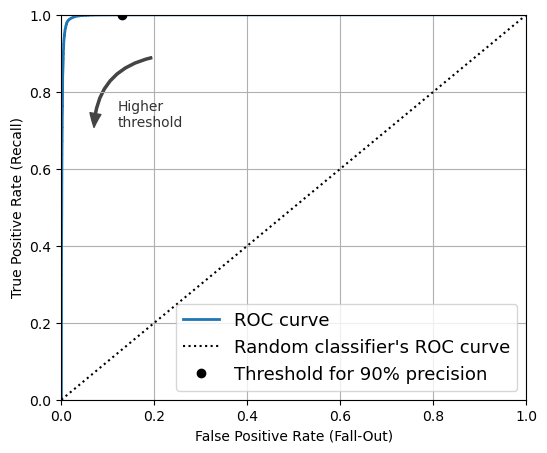

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

idx_for_threshold_at_90_sgd = (thresholds_sgd <= threshold_for_90_precision_sgd).argmax()
tpr_90_sgd, fpr_90_sgd = tpr_sgd[idx_for_threshold_at_90_sgd], fpr_sgd[idx_for_threshold_at_90_sgd]

plt.figure(figsize=(6, 5)) 
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90_sgd], [tpr_90_sgd], "ko", label="Threshold for 90% precision")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

##  11. Area Under the Curve

One way to cpmpare classifiers is to measure the AUC. A perfect classifier will have a ROC AUC equal to 1, wheras a purely random classifier will have a ROC AUC equal to 0.5. We can estimate the ROC AUC using the *roc_auc_score* method.

In [80]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9979999061121763

## 12. Precision/Recall (PR Curve)

We prefer to use the PR curve whenever the positive class is rare or when we care more about the falso positives than the false negatives.

We have:

   1. False Negative (FN): A spam wrongly classified as a non-spam.
   2. False Positive (FP): A non-spam wrongly classified as a spam.
   
So we care more if an important email (non-spam) gets classified as a spam than if a spam gets classified as a legitimate email.

The *precision_recall_curve()* function expects labels and scores for each insrance, so we need to train the classifier and make it assign a score to each instance.

Some classifiers, such the *RandomForestClassifier*, do not have a *decision,_function()* method. Such classifiers have a *predict_proba()* method that returns class prbabilities for each instance, and we can just use the probability of the positive class as a score, so it will work fine.

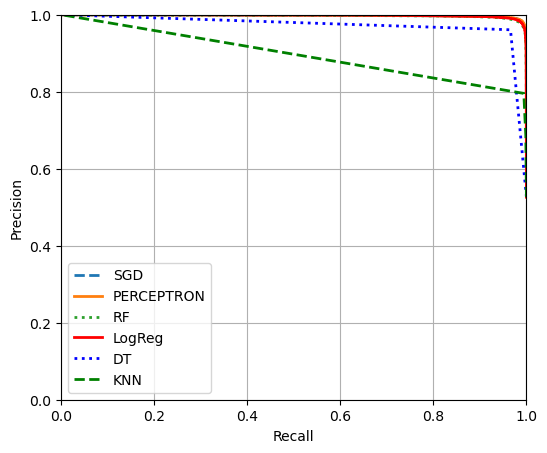

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# SGD
y_scores_sgd = cross_val_predict(sgd_clf, X_train_transformed, y_train, cv=3, method="decision_function")
precisions_sgd, recalls_sgd, _ = precision_recall_curve(y_train, y_scores_sgd)

# Perceptron
y_scores_perceptron = cross_val_predict(perceptron_clf, X_train_transformed, y_train, cv=3, method="decision_function")
precisions_perceptron, recalls_perceptron, _ = precision_recall_curve(y_train, y_scores_perceptron)

# Random Forest
y_probas_RF = cross_val_predict(RF_clf, X_train_transformed, y_train, cv=3, method="predict_proba")
y_scores_RF = y_probas_RF[:, 1]   # second column of predict_probas contains the estimated probabilities of the positive class
precisions_RF, recalls_RF, _ = precision_recall_curve(y_train, y_scores_RF)

# Logistic Regression
y_probas_logreg = cross_val_predict(logreg_clf, X_train_transformed, y_train, cv=3, method="predict_proba")
y_scores_logreg = y_probas_logreg[:, 1]
precisions_logreg, recalls_logreg, _ = precision_recall_curve(y_train, y_scores_logreg)

# Decision Tree
y_probas_dt = cross_val_predict(dt_clf, X_train_transformed, y_train, cv=3, method="predict_proba")
y_scores_dt = y_probas_dt[:, 1]
precisions_dt, recalls_dt, _ = precision_recall_curve(y_train, y_scores_dt)

# 3-NN
y_probas_KNN = cross_val_predict(KNN_clf, X_train_transformed, y_train, cv=3, method="predict_proba")
y_scores_KNN = y_probas_KNN[:, 1]
precisions_KNN, recalls_KNN, _ = precision_recall_curve(y_train, y_scores_KNN)

# Plot dimensions
plt.figure(figsize=(6, 5))

# Plot the classifiers
plt.plot(recalls_sgd, precisions_sgd, "--", linewidth=2, label="SGD")
plt.plot(recalls_perceptron, precisions_perceptron, "-", linewidth=2, label="PERCEPTRON")
plt.plot(recalls_RF, precisions_RF, ":", linewidth=2, label="RF")
plt.plot(recalls_logreg, precisions_logreg, "r-", linewidth=2, label="LogReg")
plt.plot(recalls_dt, precisions_dt, "b:", linewidth=2, label="DT")
plt.plot(recalls_KNN, precisions_KNN, "g--", linewidth=2, label="KNN")

# Make the plot look beautiful
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

# Display the plot
plt.show()

## 13. Performance on the Testing Set

### Accuracy

**Common Error:** Using
* *X_test_transformed = pipeline.**fit_transform**(X_test)*, instead of
* *X_test_transformed = pipeline.**transform**(X_test)*

When you use pipeline.fit_transform(X_test), you are actually fitting the pipeline on the testing data, which is incorrect. The correct approach is to use pipeline.transform(X_test) to transform the testing data based on the transformations learned from the training data. Here's the corrected code:

In [39]:
sgd_model = sgd_clf.fit(X_train_transformed, y_train)

X_test_transformed = pipeline.transform(X_test)
final_predictions = sgd_model.predict(X_test_transformed)

In [40]:
final_predictions

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9844218094667465
